# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откроем файл с данными и изучим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

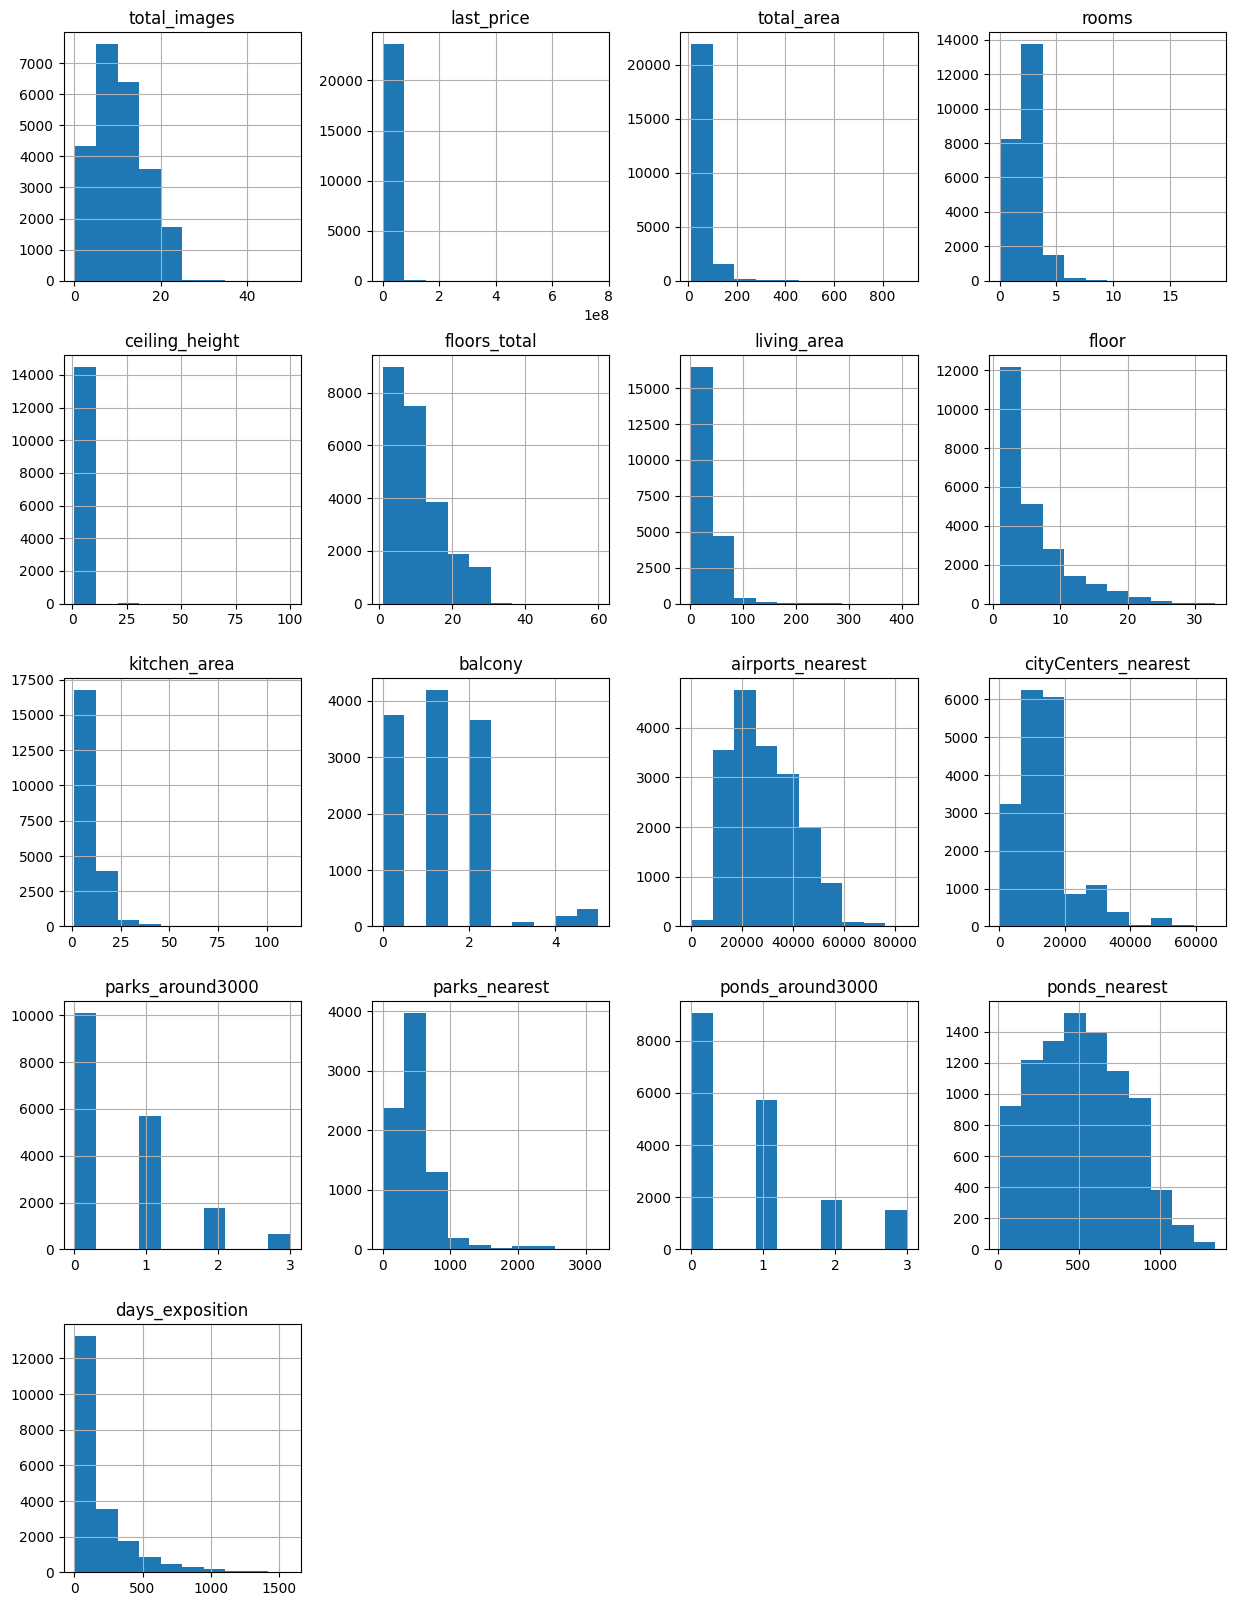

In [26]:
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

data = pd.read_csv('real_estate_data.csv', sep = '\t')
data.info()
display (data.head(30))
data.hist(figsize=(15, 20))

In [27]:
#зафиксируем изначальное число строк по необходимым столбцам
total_area_total = data['total_area'].shape[0]
living_area_total = data['living_area'].shape[0]
kitchen_area_total = data['kitchen_area'].shape[0]
last_price_total = data['last_price'].shape[0]
ceiling_height_total = data['ceiling_height'].shape[0]
city_centers_nearest_total = data['cityCenters_nearest'].shape[0]
parks_nearest_total = data['parks_nearest'].shape[0]

In [28]:
rz = data.shape[0]

### Выполним предобработку данных

Всего 23699 записи. В нескольких столбцах есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

In [29]:
#переименовываем столбец 
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
#приводим столбец с населенными пунктами к нижниму регистру
data['locality_name'] = data['locality_name'].str.lower()
#определяем в каких столбцах есть пропуски
data.isna().sum()
#поскольку данных о времени в датафрейме нет - измненим формат даты без упоминания времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#заполняем пропуски
data['is_apartment'] = data['is_apartment'].fillna('False')
data['balcony'] = data['balcony'].fillna(0)
#удаляем строки в локации и этажности где есть Null
data['locality_name'].dropna(inplace=True)
data['floors_total'].dropna(inplace=True)

data.isna().sum()

#изменяем типы данных
data['balcony'] = data['balcony'].astype('int8')
data['last_price'] = data['last_price'].astype('int64')
data['is_apartment'] = data['is_apartment'].map({'False':False, 'True':True})
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] =  data['floors_total'].astype('Int64')
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
data.isna().sum()

# заменяем пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

C:\Anaconda\envs\conda_env\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Anaconda\envs\conda_env\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Anaconda\envs\conda_env\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Anaconda\envs\conda_env\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Anaconda\envs\conda_env\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Anaconda\envs\conda_env\envs\practicum\lib\site-packages\numpy\lib\nanfu

Рассмотрим распределение пропусков в столбце количества дней публикации объявления относительно даты выставления квартиры на продажу

In [30]:
data.loc[data['days_exposition'] == 0 , ['days_exposition', 'first_day_exposition']]

,days_exposition,first_day_exposition


Видим что пропуски в количестве дней публикации присутствуют относительно разных годов начала публикации объявления. Заменим пропуски на среднее значение столбца. Взаимосвязь не прослеживается.

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_year'] = data['first_day_exposition'].dt.year
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,959,1796


Изменяем тип first_day_exposition для того, чтобы значения даты стали более понятными и читабельными
Изменяем тип is_apartment для того, чтобы работать с булевым значением.

Во всех других случаях изменение типа данных необходимо для экономии памяти.

In [32]:
#узнаем количество уникальных значений для населенных пунктов
print('Количество уникальных значений locality_name:', data['locality_name'].unique().shape[0])

Количество уникальных значений locality_name: 365


После изучения уникальных значений выявлены неявные дубликаты. Удаляем их следующими способами:
-замена "ё" на "е"
-замена "городской посёлок" на "посёлок городского типа".

In [33]:
#замена "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
#замена "городской посёлок" на "посёлок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

Теперь проверим явные дубликаты

In [34]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


In [35]:
total_remains = data.shape[0] / rz
print('Доля потерь:', total_remains-1)
if total_remains >= 0.9:
    print('Данных для анализа достаточно')
else: print('Данных для анализа недостаточно')

Доля потерь: 0.0
Данных для анализа достаточно


### Добавим в таблицу новые столбцы

In [36]:
#добавляем столбец с ценой одного квадратного метра
data['cost_per_sqm'] = data['last_price'] / data['total_area']
data['cost_per_sqm'] = data['cost_per_sqm'].astype(int)
#добавляем столбец с днём публикации объявления
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek
#столбец месяц публикации
data['month'] = data['first_day_exposition'].dt.month
#столбец год публикации
data['year'] = data['first_day_exposition'].dt.year
#столбец перевода расстояния от центра в километры
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

#столбец тип этажа квартиры
def floors_level(floor):
    for row in data['floors_total']:
        if floor == 1:
            return 'Первый'
        if floor == row and floor != 1:
            return 'Последний'
        return 'Другой'
data['floor_level'] = data['floor'].apply(floors_level)

#столбец расстояния до центра в км.
data['km_to_city_center'] = round(data['city_centers_nearest']/1000)

#столбец цены одного квадратного метра
data['price_per_square_meter'] = data['last_price']/data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,first_day_year,cost_per_sqm,dayofweek,month,year,city_centers_nearest_km,floor_level,km_to_city_center,price_per_square_meter
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.000000,8,False,...,<NA>,2019,120370,3,3,2019,16.028,Другой,16.0,120370.370370
1,7,3350000,40.40,2018-12-04,1,2.650,11,18.600000,1,False,...,81,2018,82920,1,12,2018,18.603,Первый,19.0,82920.792079
2,10,5196000,56.00,2015-08-20,2,2.600,5,34.300000,4,False,...,558,2015,92785,3,8,2015,13.933,Другой,14.0,92785.714286
3,0,64900000,159.00,2015-07-24,3,2.600,14,90.785766,9,False,...,424,2015,408176,4,7,2015,6.800,Другой,7.0,408176.100629
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.000000,13,False,...,121,2018,100000,1,6,2018,8.098,Другой,8.0,100000.000000
5,10,2890000,30.40,2018-09-10,1,2.625,12,14.400000,5,False,...,55,2018,95065,0,9,2018,NaN,Другой,NaN,95065.789474
6,6,3700000,37.30,2017-11-02,1,2.600,26,10.600000,6,False,...,155,2017,99195,3,11,2017,19.143,Другой,19.0,99195.710456
7,5,7915000,71.60,2019-04-18,2,2.750,24,40.882144,22,False,...,<NA>,2019,110544,3,4,2019,11.634,Другой,12.0,110544.692737
8,20,2900000,33.16,2018-05-23,1,2.650,27,15.430000,26,False,...,189,2018,87454,2,5,2018,NaN,Другой,NaN,87454.764777
9,18,5400000,61.00,2017-02-26,3,2.500,9,43.600000,7,False,...,289,2017,88524,6,2,2017,15.008,Другой,15.0,88524.590164


## Проведём исследовательский анализ данных

### Изучим параметры. Начнём с общей площади.

Доля потерь: 0.0


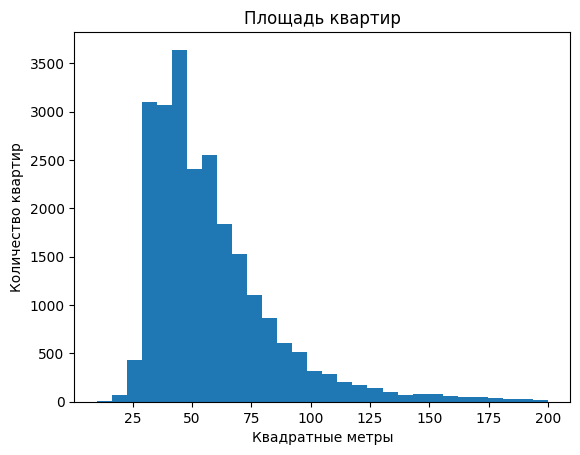

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64


In [37]:
total_area_remains = data['total_area'].shape[0] / total_area_total
print('Доля потерь:', total_area_remains-1)
if total_area_remains >= 0.9:
    plt.hist(data['total_area'], bins=30, range=(10,200))
    plt.title('Площадь квартир')
    plt.xlabel('Квадратные метры')
    plt.ylabel('Количество квартир')
    plt.show()
    print('Наибольшие по площади варианты:')
    print(data['total_area'].sort_values(ascending=False).head(10))
else: print('Данных для анализа недостаточно')

In [38]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Далее изучим показатели жилых площадей:

Доля потерь: 0.0


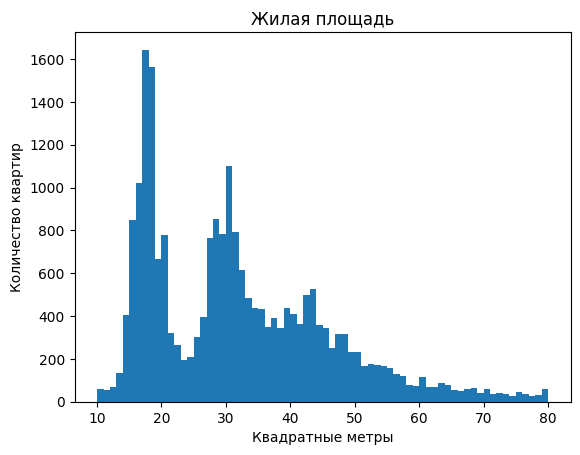

Наибольшие по жилой площади варианты:
19540    409.700000
5358     409.000000
3117     360.288168
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
5893     285.489832
Name: living_area, dtype: float64


In [39]:
living_area_remains = data['living_area'].shape[0] / living_area_total
print('Доля потерь:', living_area_remains-1)
if living_area_remains >= 0.9:
    plt.hist(data['living_area'], bins=70, range=(10,80))
    plt.title('Жилая площадь')
    plt.xlabel('Квадратные метры')
    plt.ylabel('Количество квартир')
    plt.show()
    print('Наибольшие по жилой площади варианты:')
    print(data['living_area'].sort_values(ascending=False).head(10))
else: print('Данных для анализа недостаточно')

In [40]:
data['living_area'].describe()

count    23699.000000
mean        34.594076
std         22.354668
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Далее поработаем с площадьми кухонь

Доля потерь: 0.0


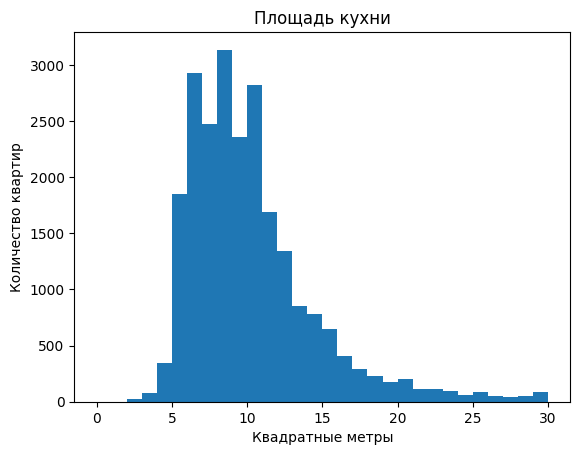

Наибольшие по площади кухни варианты:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.572854
10867     87.200000
9826      86.539494
4394      77.000000
Name: kitchen_area, dtype: float64


In [41]:
kitchen_area_remains = data['kitchen_area'].shape[0] / kitchen_area_total
print('Доля потерь:', kitchen_area_remains-1)
if kitchen_area_remains >= 0.9:
    plt.hist(data['kitchen_area'], bins=30, range=(0,30))
    plt.title('Площадь кухни')
    plt.xlabel('Квадратные метры')
    plt.ylabel('Количество квартир')
    plt.show()
    print('Наибольшие по площади кухни варианты:')
    print(data['kitchen_area'].sort_values(ascending=False).head(10))
else: print('Данных для анализа недостаточно')

In [42]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.506288
std          6.040000
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Далее работаем с ценой объекта

Доля потерь: 0.0


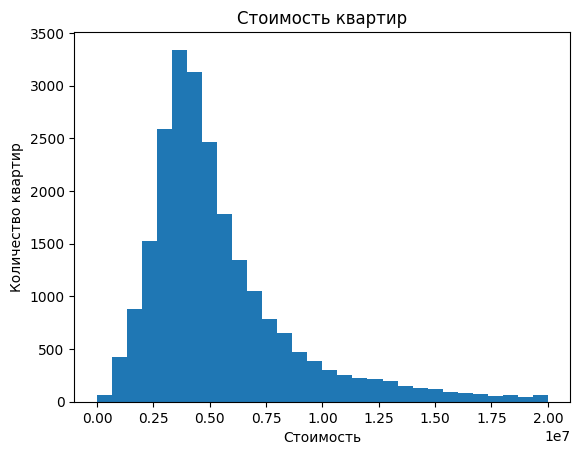

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [43]:
last_price_remains = data['last_price'].shape[0] / last_price_total
print('Доля потерь:', last_price_remains-1)
if last_price_remains >= 0.9:
    plt.hist(data['last_price'], bins=30, range=(0,20000000))
    plt.title('Стоимость квартир')
    plt.xlabel('Стоимость')
    plt.ylabel('Количество квартир')
    plt.show()
    print('Наибольшие по цене варианты:')
    print(data['last_price'].sort_values(ascending=False).head(10))
else: print('Данных для анализа недостаточно')

In [44]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Далее изучим параметры высот потолков

Доля потерь: 0.0


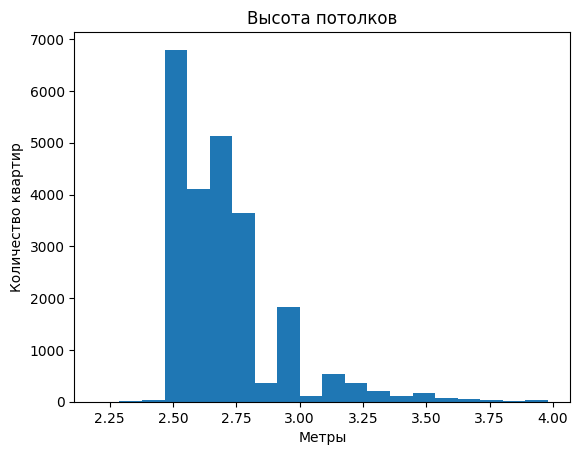

Наибольшие по высоте потолков варианты:
22869    100.0
22336     32.0
3148      32.0
21377     27.5
4876      27.0
10773     27.0
5807      27.0
22938     27.0
21824     27.0
5246      27.0
Name: ceiling_height, dtype: float64


In [45]:
ceiling_height_remains = data['ceiling_height'].shape[0] / ceiling_height_total
print('Доля потерь:', ceiling_height_remains-1)
if ceiling_height_remains >= 0.9:
    plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
    plt.title('Высота потолков')
    plt.xlabel('Метры')
    plt.ylabel('Количество квартир')
    plt.show()
    print('Наибольшие по высоте потолков варианты:')
    print(data['ceiling_height'].sort_values(ascending=False).head(10))
else: print('Данных для анализа недостаточно')

In [46]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.737376
std          1.006337
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Видим высоту потолков 25,32 м и.т.п.. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуем исправить это и сохранить большую долю данных

Доля потерь: 0.0


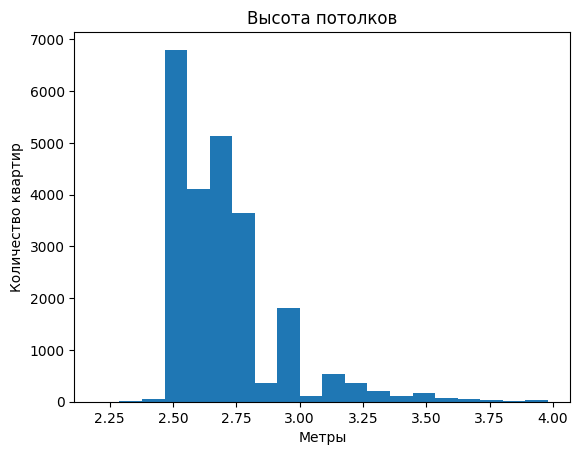

Наибольшие по высоте потолков варианты:
10102    15.00
397      14.85
15061    14.00
10067    13.85
313      13.85
10069    13.85
22309    10.30
22869    10.00
5863      8.30
15743     8.00
Name: ceiling_height, dtype: float64


In [47]:
ceiling_height_remains = data['ceiling_height'].shape[0] / ceiling_height_total
print('Доля потерь:', ceiling_height_remains-1)
if data['ceiling_height'].shape[0] / ceiling_height_total >= 0.9:
    data.loc[(data['ceiling_height'] >= 20), 'ceiling_height'] = data['ceiling_height'] / 10
    plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
    plt.title('Высота потолков')
    plt.xlabel('Метры')
    plt.ylabel('Количество квартир')
    plt.show()
    print('Наибольшие по высоте потолков варианты:')
    print(data['ceiling_height'].sort_values(ascending=False).head(10))
else: print('Данных для анализа недостаточно')

In [48]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.711738
std          0.317429
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         15.000000
Name: ceiling_height, dtype: float64

Далее изучим типы этажности

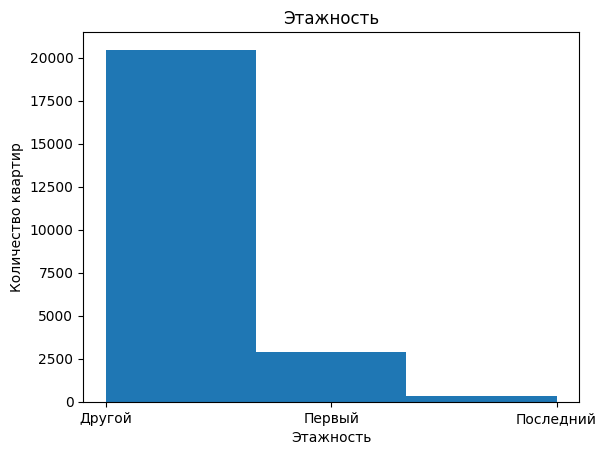

In [49]:
plt.hist(data['floor_level'], bins=3)
plt.title('Этажность')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.show()

Подавляющее большинство квартир между первым и последним этажами. Количество квартир на первом этаже больше чем количество этажей на последнем этаже

Изучим разброс расстояний до центра города в метрах

Доля потерь: 0.0


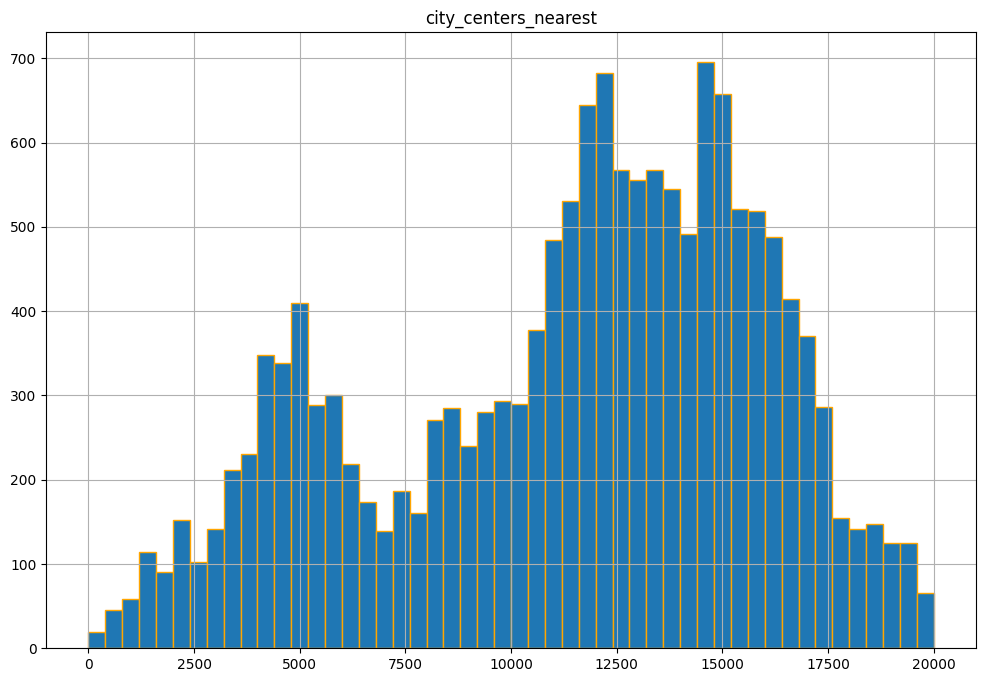

In [50]:
city_centers_nearest_remains = data['city_centers_nearest'].shape[0] / city_centers_nearest_total
print('Доля потерь:', city_centers_nearest_remains-1)

if city_centers_nearest_remains >= 0.9:
    data.hist('city_centers_nearest', bins=50, range = (0, 20000), figsize=(12,8), ec='orange');
else: print('Данных для анализа недостаточно')

In [51]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Большая часть квартир находится примерно на расстоянии 16 км от центра

Далее изучим разброс расстояний до ближайшего парка

Доля потерь: 0.0


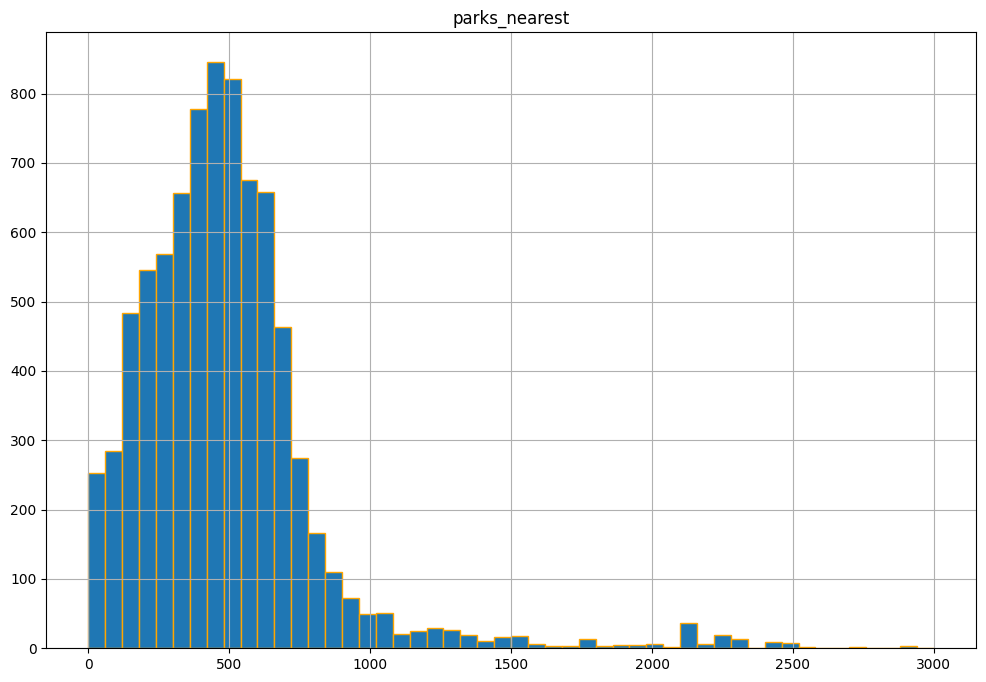

In [52]:
parks_nearest_remains = data['parks_nearest'].shape[0] / parks_nearest_total
print('Доля потерь:', parks_nearest_remains-1)
if parks_nearest_remains >= 0.9:
    data.hist('parks_nearest', bins=50, range = (0, 3000), figsize=(12,8), ec='orange');
else: print('Данных для анализа недостаточно')

In [53]:
data.parks_nearest.describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В данном наборе данных квартиры либо аппартаменты имеют расстояние от парка не более 3 км. Есть варианты в непосредственной близости от парка

#### Далее изучим время продажи квартиры. Покажем разброс времени размещения объявлений.

Время продажи (медиана): 95 

Время продажи (среднее): 181 



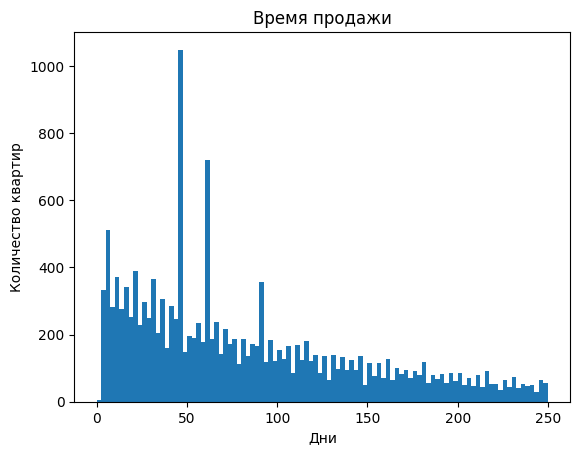

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [54]:
# Отбрасываем нулевые значеня
print('Время продажи (медиана):', round(data.query('days_exposition != 0')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 0')['days_exposition'].mean()),'\n')
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 0')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 0')['days_exposition'].describe()

Срок продажи квартиры в медианном выражении - 105 дней. 
Срок продажи квартиры в среднем - 189 дней.
Большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько месяцев.
Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

### Определим факторы, которые больше всего влияют на общую стоимость объекта

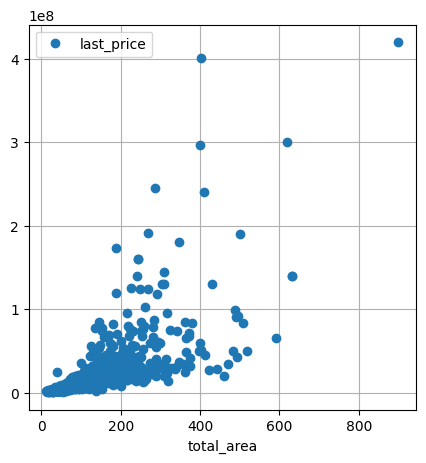

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.738972
total_area    0.738972    1.000000 



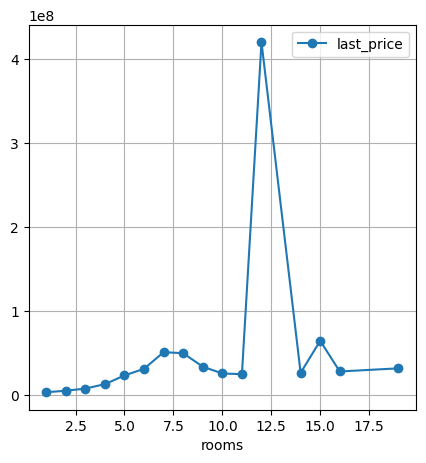

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.435171
rooms         0.435171  1.000000 



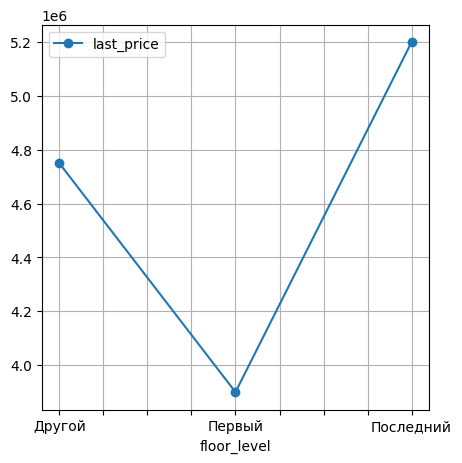

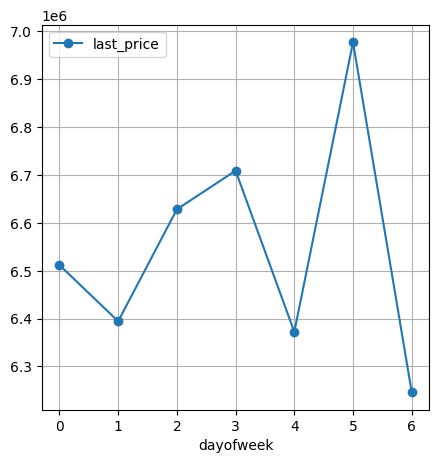

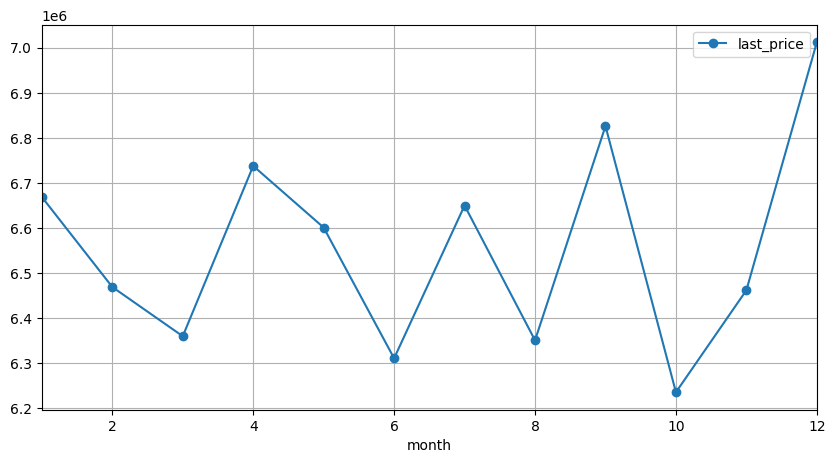

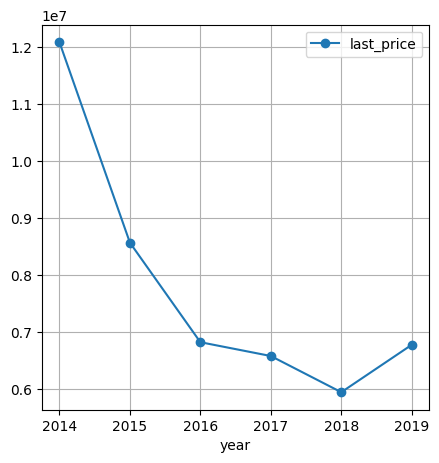

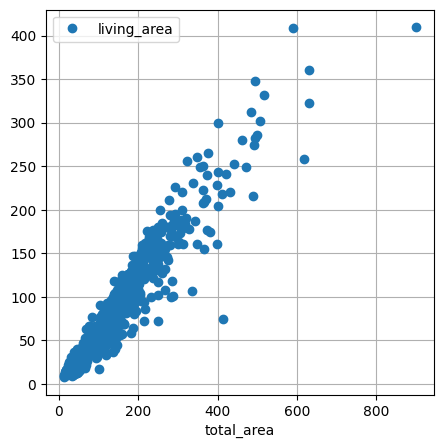

Корреляция цены и жилой площади: 

             living_area  total_area
living_area     1.000000    0.919916
total_area      0.919916    1.000000 



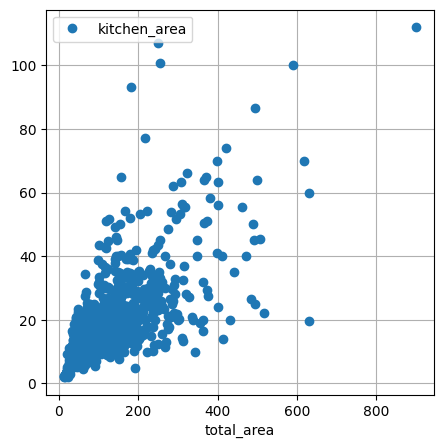

Корреляция цены и площади кухни: 

              kitchen_area  total_area
kitchen_area      1.000000    0.433361
total_area        0.433361    1.000000 



In [55]:
# Зависимость цены от площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(
    data.pivot_table(index='floor_level', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость от дня размещения
(
    data.pivot_table(index='dayofweek', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость цены жилой площади
(
    data.pivot_table(index='total_area', values='living_area')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'living_area']).corr(),'\n')

# Зависимость цены от площади кухни
(
    data.pivot_table(index='total_area', values='kitchen_area')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'kitchen_area']).corr(),'\n')

##### Вывод 
Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Корреляция цены квартиры от жилой площади очень высокая, однако корреляция цены квартир от площади кухни значительно меньше.
Можно сделать вывод что покупатели гораздо меньше обращают внимание на площадь кухни чем на общую площадь квартиры.

День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу.
Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

## Средняя стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [56]:
# определяем число объявлений
top_10 = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
top_10.columns=['number_of_ads']
top_10.reset_index()

,locality_name,number_of_ads
0,санкт-петербург,15721
1,поселок мурино,556
2,поселок шушары,440
3,всеволожск,398
4,пушкин,369
5,колпино,338
6,поселок парголово,327
7,гатчина,307
8,деревня кудрово,299
9,выборг,237


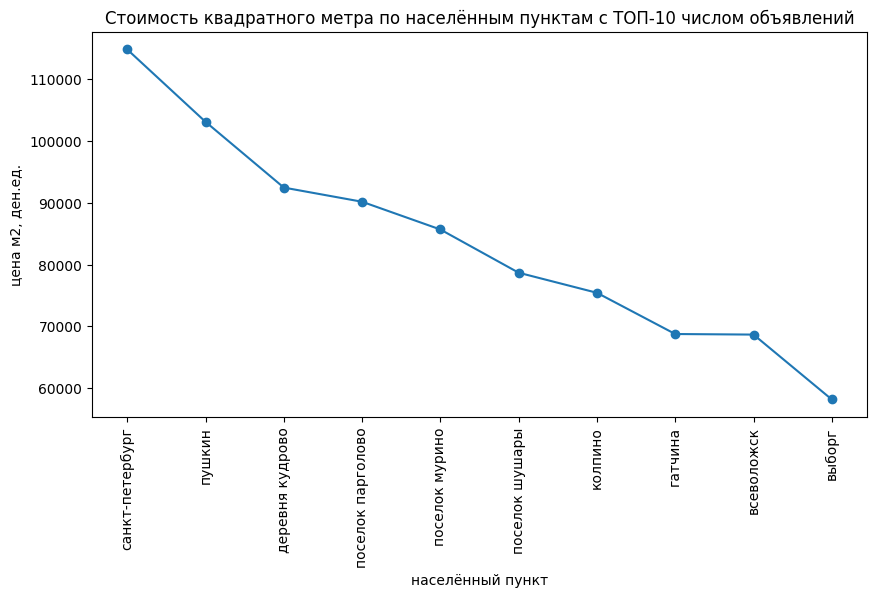

In [57]:
top_10['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
top_10s = top_10.sort_values(by='cost_per_meter_mean', ascending=False).reset_index()

# Построим график
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title = 'Стоимость квадратного метра по населённым пунктам с ТОП-10 числом объявлений',
       xlabel='населённый пункт',
       ylabel='цена м2, ден.ед.')
ax.plot(top_10s['locality_name'], top_10s['cost_per_meter_mean'], 'o-')
plt.xticks(rotation='vertical')
plt.show()

### Cредняя стоимость квартир г. Санкт-Петербург на разном удалении от центра.

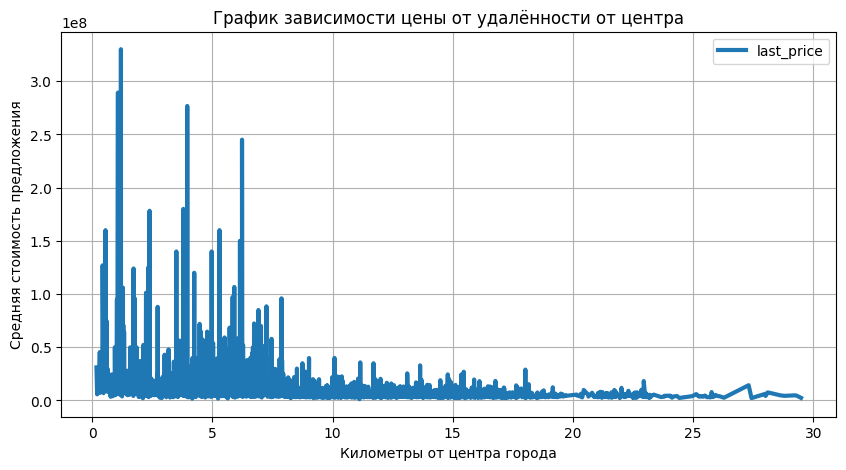

In [58]:
spb = data.loc[data['locality_name'] == 'санкт-петербург']
spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

Из графика видно что устойчивое падение цены появилось при достижении значения 7 км, это говорит нам, что центральным районом можно считать все квартиры в удалении от центра не более чем на 7 км.

## Общий вывод

Срок продажи квартиры

В среднем квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Много квартир было продано всего за несколько дней после публикации.
Есть квартиры, которые продавались несколько месяцев.

Факторы, влияющие на стоимость

На стоимость квартиры больше влияет площадь квартиры, нежели число комнат или площадь кухни. Т.е. могут быть дорогие квартиры с малым числом комнат и небольшой кухней, но с проторными комнатами.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме 
первого.

Стоимость квадратного метра в топ-10 населённых пунктов

Самый дорогой квадрат в Санкт-Петербурге 
Самый дешевый в Выборге

Установлено что до 7 км от центра Санкт-Петербург присутствует разброс цен однако начиная от 7 км от центра и дальше разброс практически выравнивается.